In [34]:
#Loading EDA Libraries
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [35]:
#enoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [36]:
#Hyperparameters Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [37]:
#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
#Evaluation Models
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [40]:
from sklearn.decomposition import PCA

## Loading Data

In [41]:
df=pandas.read_csv('winequality-white.csv', sep=';')

In [42]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Exploratory Data Analysis

In [43]:
#Checking Column Names
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [44]:
#Checking Missing Values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [45]:
#Checking DataTypes
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [46]:
df.shape

(4898, 12)

## Quality Bar Count Plot

In [47]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

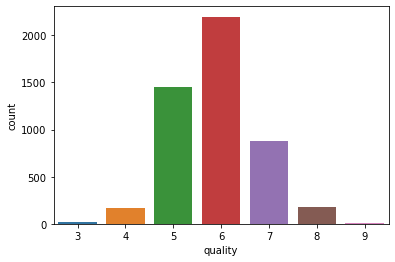

In [48]:
sns.countplot(df['quality'])

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pH', ylabel='count'>

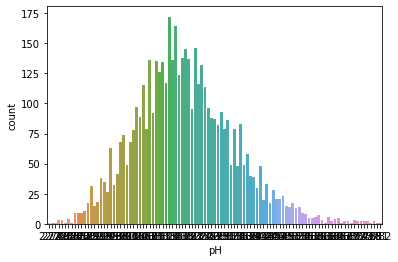

In [49]:
sns.countplot(df['pH'])

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol', ylabel='count'>

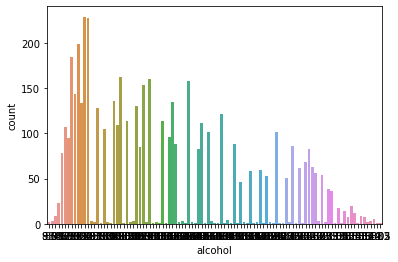

In [50]:
sns.countplot(df['alcohol'])

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

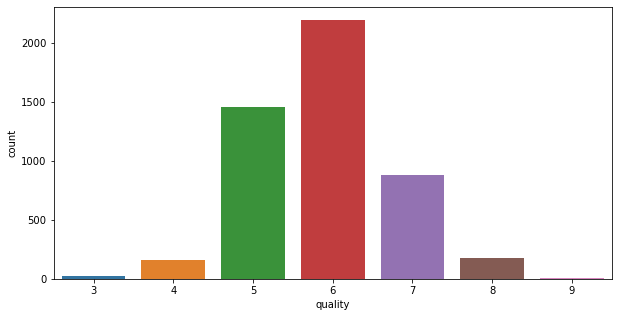

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(df['quality'])

In [52]:
quality=df['quality'].values
quality

array([6, 6, 6, ..., 6, 7, 6])

## Transform Data

In [53]:
bins=[]
for q in quality:
    if q<5:
        bins.append('Low')
    elif q>6:
        bins.append('High')
    else:
        bins.append('Medium')
[(c,bins.count(c)) for c in set(bins)]

[('Low', 183), ('Medium', 3655), ('High', 1060)]

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

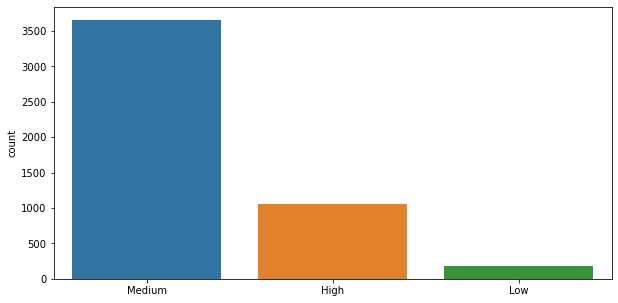

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(bins)

## Correlation Matrix

<AxesSubplot:>

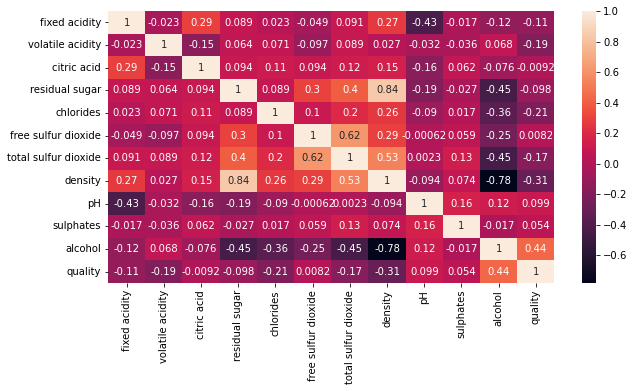

In [55]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [56]:
bins=pandas.DataFrame(data=bins,columns=['category'])

In [57]:
bins

,category
0,Medium
1,Medium
2,Medium
3,Medium
4,Medium
...,...
4893,Medium
4894,Medium
4895,Medium
4896,High


In [58]:
wine=pandas.concat([df,bins],axis=1)

In [59]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium


In [60]:
wine.drop(columns='quality',axis=1,inplace=True)

In [61]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium


## Split Data into X and Y

In [62]:
x_features=wine.iloc[:,:-1].values

In [63]:
x_features

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [64]:
y_labels=wine.iloc[:,-1].values

In [65]:
y_labels

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'High', 'Medium'],
      dtype=object)

In [66]:
y_labels=LabelEncoder().fit_transform(y_labels)

In [67]:
y_labels

array([2, 2, 2, ..., 2, 0, 2])

## Train and Test Split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x_features,
                                              y_labels,test_size=0.2,
                                              random_state=100)

## Model Building

## RandomForestClassifier Using GridSearch

In [71]:
clf = RandomForestClassifier(max_depth=12,random_state=0)
params={'n_estimators':[50,100,150,200,250],
       'min_samples_leaf':[1,2,4]}
rfc_gs=GridSearchCV(clf,param_grid=params,scoring='accuracy',cv=5)
rfc_gs.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=12, random_state=0),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='accuracy')

In [72]:
rfc_gs.best_score_

0.8272063231422837

## Support Vector Machines Using GridSearch

In [73]:
skf=StratifiedKFold(n_splits=14)
svc=Pipeline([('clf',svm.SVC())])
params=dict(clf__C=[0.1,0.3,1,3,10],
           clf__gamma=[0.1,0.3,1,3,10],
           clf__kernel=['rbf','sigmoid'])
gs_svm=GridSearchCV(estimator=svc,
                    param_grid=params,
                   scoring='accuracy',
                   cv=skf)

In [74]:
gs_svm.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=14, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('clf', SVC())]),
             param_grid={'clf__C': [0.1, 0.3, 1, 3, 10],
                         'clf__gamma': [0.1, 0.3, 1, 3, 10],
                         'clf__kernel': ['rbf', 'sigmoid']},
             scoring='accuracy')

In [75]:
gs_svm.best_score_

0.8205617730963353

## Predict Using SVM

In [76]:
predict_svm=gs_svm.predict(x_test)
print(classification_report(y_test,predict_svm))
print('SVM on test data %s'%accuracy_score(y_test,predict_svm))

              precision    recall  f1-score   support

           0       1.00      0.36      0.53       216
           1       1.00      0.16      0.27        32
           2       0.82      1.00      0.90       732

    accuracy                           0.83       980
   macro avg       0.94      0.50      0.56       980
weighted avg       0.86      0.83      0.80       980

SVM on test data 0.8306122448979592


## DecisionTreeClassifier Using GridSearchCV

In [77]:
clf=Pipeline([('scl',StandardScaler()),
             ('pca',PCA(random_state=11)),
             ('clf',DecisionTreeClassifier(random_state=11))])

In [78]:
criterion=['gini','entropy']
splitter=['best']
max_depth=[8,9,10,22,25]
min_samples_leaf=[2,5]
class_weight=['balanced',None]

In [79]:
params=[{'clf__criterion':criterion,
        'clf__splitter':splitter,
        'clf__max_depth':max_depth,
        'clf__min_samples_leaf':min_samples_leaf,
        'clf__class_weight':class_weight}]

In [80]:
gs_dt=GridSearchCV(estimator=clf,param_grid=params,
                  scoring='accuracy',cv=4,n_jobs=-1)
gs_dt.fit(x_train,y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(random_state=11)),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=11))]),
             n_jobs=-1,
             param_grid=[{'clf__class_weight': ['balanced', None],
                          'clf__criterion': ['gini', 'entropy'],
                          'clf__max_depth': [8, 9, 10, 22, 25],
                          'clf__min_samples_leaf': [2, 5],
                          'clf__splitter': ['best']}],
             scoring='accuracy')

In [81]:
gs_dt.best_score_

0.76187045298201

## KNN Using GridSearchCV

In [82]:
pca=Pipeline([('pca',PCA()),
             ('clf',KNeighborsClassifier())])
params=dict(pca__n_components=range(1,10),clf__n_neighbors=range(1,2))
gs_knn=GridSearchCV(estimator=pca,
                   param_grid=params,
                   scoring='accuracy')

In [83]:
gs_knn.fit(x_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': range(1, 2),
                         'pca__n_components': range(1, 10)},
             scoring='accuracy')

In [84]:
gs_knn.best_score_

0.7447588422342117

## Random Forest check on Test Data

In [85]:
predict_rfc=rfc_gs.predict(x_test)
print(classification_report(y_test,predict_rfc))
print('RF on test data %s' %accuracy_score(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       0.81      0.53      0.64       216
           1       0.50      0.06      0.11        32
           2       0.84      0.96      0.90       732

    accuracy                           0.84       980
   macro avg       0.72      0.52      0.55       980
weighted avg       0.83      0.84      0.82       980

RF on test data 0.8377551020408164
